In [1]:
import numpy as np
import array
from spectlinetools import match_bins
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

In [2]:
def checkCorrelation(col1, col2, df):
    dct = {}
    for k in df[col1].unique():
        dct[k] = []
    for index in df.index:
        key = df[col1][index]
        val = df[col2][index]
        #print(df['Highest Coherence'][index])
        if df['Highest Coherence'][index] > 0.20:
            dct[key] += [val]
    d1 = pd.DataFrame({})
    for key,val in dct.items():
        #print(key,val)
        d1 = pd.concat([d1,pd.DataFrame({key:val})], axis = 1)
    return d1

In [3]:
#load npz file
fileName1 = \
['0509coh_matrix.npz',\
 '0510coh_matrix.npz',\
 '0513coh_matrix.npz',\
 '0515coh_matrix.npz',\
 '0516coh_matrix.npz',\
 '0517coh_matrix.npz',\
 '0518coh_matrix.npz',\
 '0519coh_matrix.npz',\
 '0520coh_matrix.npz',\
 '0521coh_matrix.npz',\
 '0522coh_matrix.npz',\
'0524coh_matrix.npz',\
'0527coh_matrix.npz']
fileName2 = \
['0509Fscan.txt',\
 '0510Fscan.txt',\
 '0513Fscan.txt',\
 '0515Fscan.txt',\
 '0516Fscan.txt',\
 '0517Fscan.txt',\
 '0518Fscan.txt',\
 '0519Fscan.txt',\
 '0520Fscan.txt',\
 '0521Fscan.txt',\
 '0522Fscan.txt',\
 '0524Fscan.txt',\
'0527Fscan.txt']
days = \
['20230509',\
 '20230510',\
 '20230513',\
 '20230515',\
 '20230516',\
 '20230517',\
 '20230518',\
 '20230519',\
 '20230520',\
 '20230521',\
 '20230522',\
 '20230524',\
 '20230527']


for fileIndex in range(len(days)):
    
    with np.load(fileName1[fileIndex]) as data:
        coh = data['cut_coh_table']
        chName = data['chanmatrix']
        StampFre = data['frequencies']
        st = data['st']
        et = data['et']
        #print(coh)
        #print(np.shape(coh))
        #print(chName)
        #print(StampFre)
        #print(st)
        #print(et)
print(type(coh)) 
print(chName.shape)
print(StampFre.shape)
    


<class 'numpy.ndarray'>
(2028, 20)
(2028,)


### Combine Dataframes
Step1: Create two dataframes: `allDf_PEM` and `allDf_Fscan`.
* Columns we want to extract from `allDf_PEM`: 
    1. "Stamp-PEM Freq"
    2. "Coherence" + str(col+1)
    2. "Channels" + str(col+1)
* Columns we want to extract from `allDf_Fscan`:
    1. 'Fscan Freq'
    2. 'Comb',
    3. 'Offset'

Step2: Merge the two dataframe into one dataframe.

Step3: extract columns to make pie charts, heatmap and scatterplots

Step4: Save the dataframe into excel

In [4]:
allDf_PEM = []
for fileIndex in range(len(days)): 
    # make a dataframe that contains Stamp-PEM Freq
    df_Stamp_PEM = pd.DataFrame({"Stamp-PEM Freq": StampFre})
    # append all pointers that points to df_Stamp_PEM into a list called allDf_PEM
    allDf_PEM.append(df_Stamp_PEM)
  
    # create a for loop to add 1st cohMag & channel name
    for col in range(20):                                             # coh.shape[1] = 20    
        df_Stamp_PEM["Coherence" + str(col+1)] = coh[:,col]
        df_Stamp_PEM["Channels" + str(col+1)] = chName[:,col]
   
        discard = (df_Stamp_PEM["Coherence" + str(col+1)] < 0.20)
     
        df_Stamp_PEM.loc[discard, "Coherence" + str(col+1)] = np.nan  # "Coherence1" "Coherence2"
        df_Stamp_PEM.loc[discard, "Channels" + str(col+1)] = np.nan

# print discard for the 20th most cohColumn, notice <20% is True, which will set to na later
#print(discard.head(15))

##  syntax: arr[row, col]
1. arr is df_Stamp_PEM.loc
2. b is row
3. "Coherence" + str(col+1) is col
4.  pandas.DataFrame.loc access a group of rows and columns by label(s) or a boolean array
5. notice that the variable b is a boolean array, return true if cell is < 0.2

### Dropping coherence val & ch < 0.2 (row by row)
The table below cells after dropping the `[<0.2=True]` columns


In [5]:
allDf_PEM[0].head(4)

,Stamp-PEM Freq,Coherence1,Channels1,Coherence2,Channels2,Coherence3,Channels3,Coherence4,Channels4,Coherence5,...,Coherence16,Channels16,Coherence17,Channels17,Coherence18,Channels18,Coherence19,Channels19,Coherence20,Channels20
0,10.0,0.425166,H1:ASC-DHARD_Y_OUT_DQ,0.322541,H1:ASC-AS_A_DC_NSUM_OUT_DQ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.5,0.418988,H1:ASC-X_TR_B_NSUM_OUT_DQ,0.413642,H1:ASC-DHARD_Y_OUT_DQ,0.374566,H1:ASC-X_TR_B_PIT_OUT_DQ,0.336137,H1:ASC-DSOFT_P_OUT_DQ,0.334976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11.0,0.509513,H1:ASC-DHARD_Y_OUT_DQ,0.432462,H1:ASC-X_TR_B_PIT_OUT_DQ,0.400406,H1:ASC-DSOFT_P_OUT_DQ,0.394214,H1:ASC-X_TR_B_YAW_OUT_DQ,0.393038,...,0.319243,H1:ASC-CSOFT_Y_OUT_DQ,0.313114,H1:ASC-AS_B_RF36_I_YAW_OUT_DQ,0.300657,H1:LSC-REFL_A_RF9_I_ERR_DQ,0.288055,H1:ASC-REFL_B_RF9_I_YAW_OUT_DQ,0.280469,H1:ASC-REFL_B_DC_NSUM_OUT_DQ
3,11.5,0.673865,H1:LSC-POP_A_RF45_I_ERR_DQ,0.671902,H1:LSC-SRCL_OUT_DQ,0.666619,H1:LSC-REFL_A_LF_OUT_DQ,0.662842,H1:LSC-REFL_A_RF9_Q_ERR_DQ,0.655889,...,0.547068,H1:ASC-REFL_A_DC_NSUM_OUT_DQ,0.536840,H1:LSC-REFL_A_RF45_Q_ERR_DQ,0.516801,H1:LSC-POP_A_LF_OUT_DQ,0.514775,H1:LSC-POP_A_RF45_Q_ERR_DQ,0.511999,H1:LSC-MICH_OUT_DQ


### Type Annotations in Python
Note `:`
https://towardsdatascience.com/type-annotations-in-python-d90990b172dc
#df:pd.DataFrame = XXXX -> specify type in python

We have 2 lists of dataframes, this allow us to write shorter cells, since these two provide us access to 
df_PEM and df_Fscan over "fileIndex"?
allDf_PEM
allDf_Fscan can be used outside of the for loop (cell below). So when I use "allDf_Fscan" in a seperate cell,
it contains 

for fileIndex in range(len(days)):
    df:pd.DataFrame = allDf

In [6]:
### load Fscan.txt into a pandas dataframe. Then merge the FscanPD with the CohPD
allDf_Fscan = []

for fileIndex in range(len(days)):
    import pandas as pd
    fscanFreqFiles = open(fileName2[fileIndex], 'r+')
    fscanFreqLines = fscanFreqFiles.readlines();
    count = 0
    FscanFreqCol = []
    FreqDescrptionCol = []
    combCol, offsetCol = [],[]
    
    for line in fscanFreqLines:
        count += 1
        formattedLines = ('(Fscan Frequency) line {}: {}'.format(count, line.strip()))
        #split string into lists
        splittedItems = formattedLines.split(',')
        #print(splittedItems)
        FsFreq = splittedItems[0]
        FscanFreq = FsFreq.split(': ')
        FscanFreqCol += [float(FscanFreq[1])]
        FreqDescrptionCol += [splittedItems[1]]
        #print(splittedItems[1].split(' ')[5].split(';'))
        comb,offset = splittedItems[1].split(' ')[5].split(';')
        comb = [float(comb)]
        combCol += comb
        #print(combCol)
        offset = [float(offset)]
        offsetCol += offset    
    
    df_Fscan=pd.concat([pd.DataFrame([[FscanFreqCol[i], round(combCol[i], 4),offsetCol[i]]], 
                               columns=['Fscan Freq', 'Comb','Offset']) for i in range(len(FscanFreqCol))],
              ignore_index=True)
    
    allDf_Fscan.append(df_Fscan)
    
#allDf_Fscan = [05092023(df_Fscan), 05102023(df_Fscan), ..., 05272023(df_Fscan)
#allDf_Fscan contains df_Fscan in May in the form of a list[day=09,day=10,day=13]

In [7]:
# match frequencies using match_bins
# need to specify the index in the arr allDf_PEM to access the info in the "Stamp-PEM Freq" column
for fileIndex in range(len(days)):
    StampFre = allDf_PEM[fileIndex]["Stamp-PEM Freq"]
    FscanFreqCol = allDf_Fscan[fileIndex]["Fscan Freq"]
    combinds = match_bins(StampFre, FscanFreqCol)
    #print(len(StampFre), len(FscanFreqCol), combinds)
    
    stampMatched = StampFre[combinds]  # StampFreq aligned with FscanFreq
    
    # add the ['Stamp-PEM Freq']column to the allDf_Fscan (among fileIndex)
    allDf_Fscan[fileIndex]['Stamp-PEM Freq'] = stampMatched.values 
    
    # now: join/merge dataframe
    #join(temp, FScanFreq, comb,Coh, ch )
    for col in range(20): # loop over the 20 columns in npz file, coh.shape[1] = 20
        allDf_Fscan[fileIndex]["Coherence"+str(col+1)]=allDf_PEM[fileIndex]["Coherence"+str(col+1)][combinds].values
            
        allDf_Fscan[fileIndex]["Channels"+str(col+1)]=allDf_PEM[fileIndex]["Channels"+str(col+1)][combinds].values
        #print(allDf_PEM[fileIndex]["Coherence" + str(col+1)][combinds].values)

allDf_Fscan[0].head(39)

,Fscan Freq,Comb,Offset,Stamp-PEM Freq,Coherence1,Channels1,Coherence2,Channels2,Coherence3,Channels3,...,Coherence16,Channels16,Coherence17,Channels17,Coherence18,Channels18,Coherence19,Channels19,Coherence20,Channels20
0,29.905556,4.9842,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.889444,4.9842,0.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.873889,4.9842,0.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44.858333,4.9842,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49.842222,4.9842,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,54.826667,4.9842,0.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,59.811111,4.9842,0.0,60.0,0.838289,H1:ASC-AS_B_RF36_Q_PIT_OUT_DQ,0.823054,H1:ASC-AS_B_RF36_Q_YAW_OUT_DQ,0.817482,H1:LSC-POP_A_RF9_Q_ERR_DQ,...,0.798851,H1:ISI-ETMX_ST2_BLND_Z_GS13_CUR_IN1_DQ,0.798267,H1:PEM-EX_MAG_EBAY_SEIRACK_Y_DQ,0.798190,H1:PEM-EY_MAG_VEA_FLOOR_Y_DQ,0.797941,H1:PEM-CS_MAG_LVEA_VERTEX_Y_DQ,0.797891,H1:PEM-EY_MAG_EBAY_SEIRACK_X_DQ
7,61.461667,1.6611,0.0,61.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,64.783889,1.6611,0.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,64.795000,4.9842,0.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#for a, b in zip(StampFre[combinds], FscanFreqCol):
    #print(a, b)

### Note:
* pd.concat has a build-in for loop, so DF already contained info in for fileIndex in range(len(days))
* ax.pie can be replaced with plt.pie

In [9]:
for fileIndex in range(len(days)):
    with pd.ExcelWriter(days[fileIndex] + 'all.xlsx') as writer:
        # put all dataframes into one excel file, with seperate sheets
        allDf_Fscan[fileIndex].to_excel(writer, sheet_name='_Comb_Table')
        
        allDf_Fscan[fileIndex].sort_values(by=["Coherence" + str(1)], ascending=False).to_excel(writer, sheet_name='_RkByCoh_Table')
        #df1.to_excel(writer, sheet_name='_ChToComb_Table')
        #df2.to_excel(writer, sheet_name='_combToCh_Table')
        #df3.to_excel(writer, sheet_name='_combToHighestCoh_Table')
        # add days[fileIndex]+'Coh_Comb_PieChart.xlsx' as the 6th sheet
        

DF = pd.concat(allDf_Fscan,ignore_index=True)        
with pd.ExcelWriter('May2023_all.xlsx') as writer:
    # put all dataframes into one excel file, with seperate sheets
    DF.to_excel(writer, sheet_name='_Comb_Table')
    DF.sort_values(by=["Coherence" + str(1)], ascending=False).to_excel(writer, sheet_name='_RkByCoh_Table')
    #df1.to_excel(writer, sheet_name='_ChToComb_Table')
    #df2.to_excel(writer, sheet_name='_combToCh_Table')
    #df3.to_excel(writer, sheet_name='_combToHighestCoh_Table')    
    


# nested for loop, for each r, loop col by col
# if only loop over allRows, only 1st Col&Ch will be added
allRows = len(DF)
allCols = 20
chCounts, dctComb = {},{}

for r in range(allRows):
    comb = DF["Comb"][r]
    for c in range(allCols):
        ch = DF["Channels" + str(c+1)][r]
        coh = DF["Coherence" + str(c+1)][r]
        
        if (not np.isnan(coh)):
            if (ch not in chCounts):
                chCounts[ch] = 0
            chCounts[ch] += 1 # counts of chs in the dctCh
            if (comb not in dctComb):
                dctComb[comb] = 0
            dctComb[comb] += 1
        # print the nan cells
        #else:
         #   print("hi")

        
# convert one dict into 2 list
sizes, labels = [], []
for singleChName,singleChCounts in chCounts.items():
    sizes += [singleChCounts]
    labels += [singleChName]
fig, ax = plt.subplots(figsize=(22,22))
p, tx, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%')

for i, val in enumerate(autotexts):
    val.set_text("{}".format(sizes[i]))
    
ax.set_title("Coherence Channels Occurences in May 2023")
plt.savefig("Coherence Channels Occurences in May 2023.png",facecolor='white', edgecolor='none')
plt.close()


In [10]:
# can makes the ticks longer 
fig, ax = plt.subplots(figsize=(50,26))
plt.bar(range(len(chCounts)), list(chCounts.values()), width = 0.8, linewidth=0.3, align='edge')
plt.xticks(range(len(chCounts)), list(chCounts.keys()))
plt.yticks()
ax.tick_params(axis='y', which='major', labelsize=30)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
plt.title("Coherence Channels Occurences in May 2023")
fig.savefig(f"Bar_Coherence_Channels_May 2023.png", facecolor='white', edgecolor='none')
plt.close()

In [11]:
len(DF)

3647

In [12]:
wb = openpyxl.load_workbook('May2023_all.xlsx')
ws = wb.create_sheet('Coh_Comb_PieChartMay2023')
img = openpyxl.drawing.image.Image("Coherence Channels Occurences in May 2023.png")
img.anchor = 'A1'
ws.add_image(img)

In [13]:
# get all unique combs,sorted(list)
sortedComb = sorted(list(set(DF['Comb'])))
#sortedCh = sorted(list(set(DF["Channels" + str(1)])))
# TypeError: '<' not supported between instances of 'str' and 'float'
temp = set()
for c in range(allCols):
    temp.update(set(DF["Channels" + str(c+1)]))  # set1.update(set2)  provide the y axis in the heatmap(all channels)
temp.remove(np.nan)
#print(temp)
sortedCh = sorted(list(temp))

# use dictionary comprehension to use index in the combXCh matrix later on
#CombToIndex = {sortedComb[i] : i for i in range(len(sortedComb))}
#CombToCh = {sortedCh[i] : i for i in range(len(sortedCh))}
# enumerate
CombToIndex = {comb : index for index,comb in enumerate(sortedComb)}
ChToIndex = {Ch : index for index,Ch in enumerate(sortedCh)}

FileNotFoundError: [Errno 2] No such file or directory: '[1.0 Before Normalization] Correlation between Combs and Channels May/23.png'

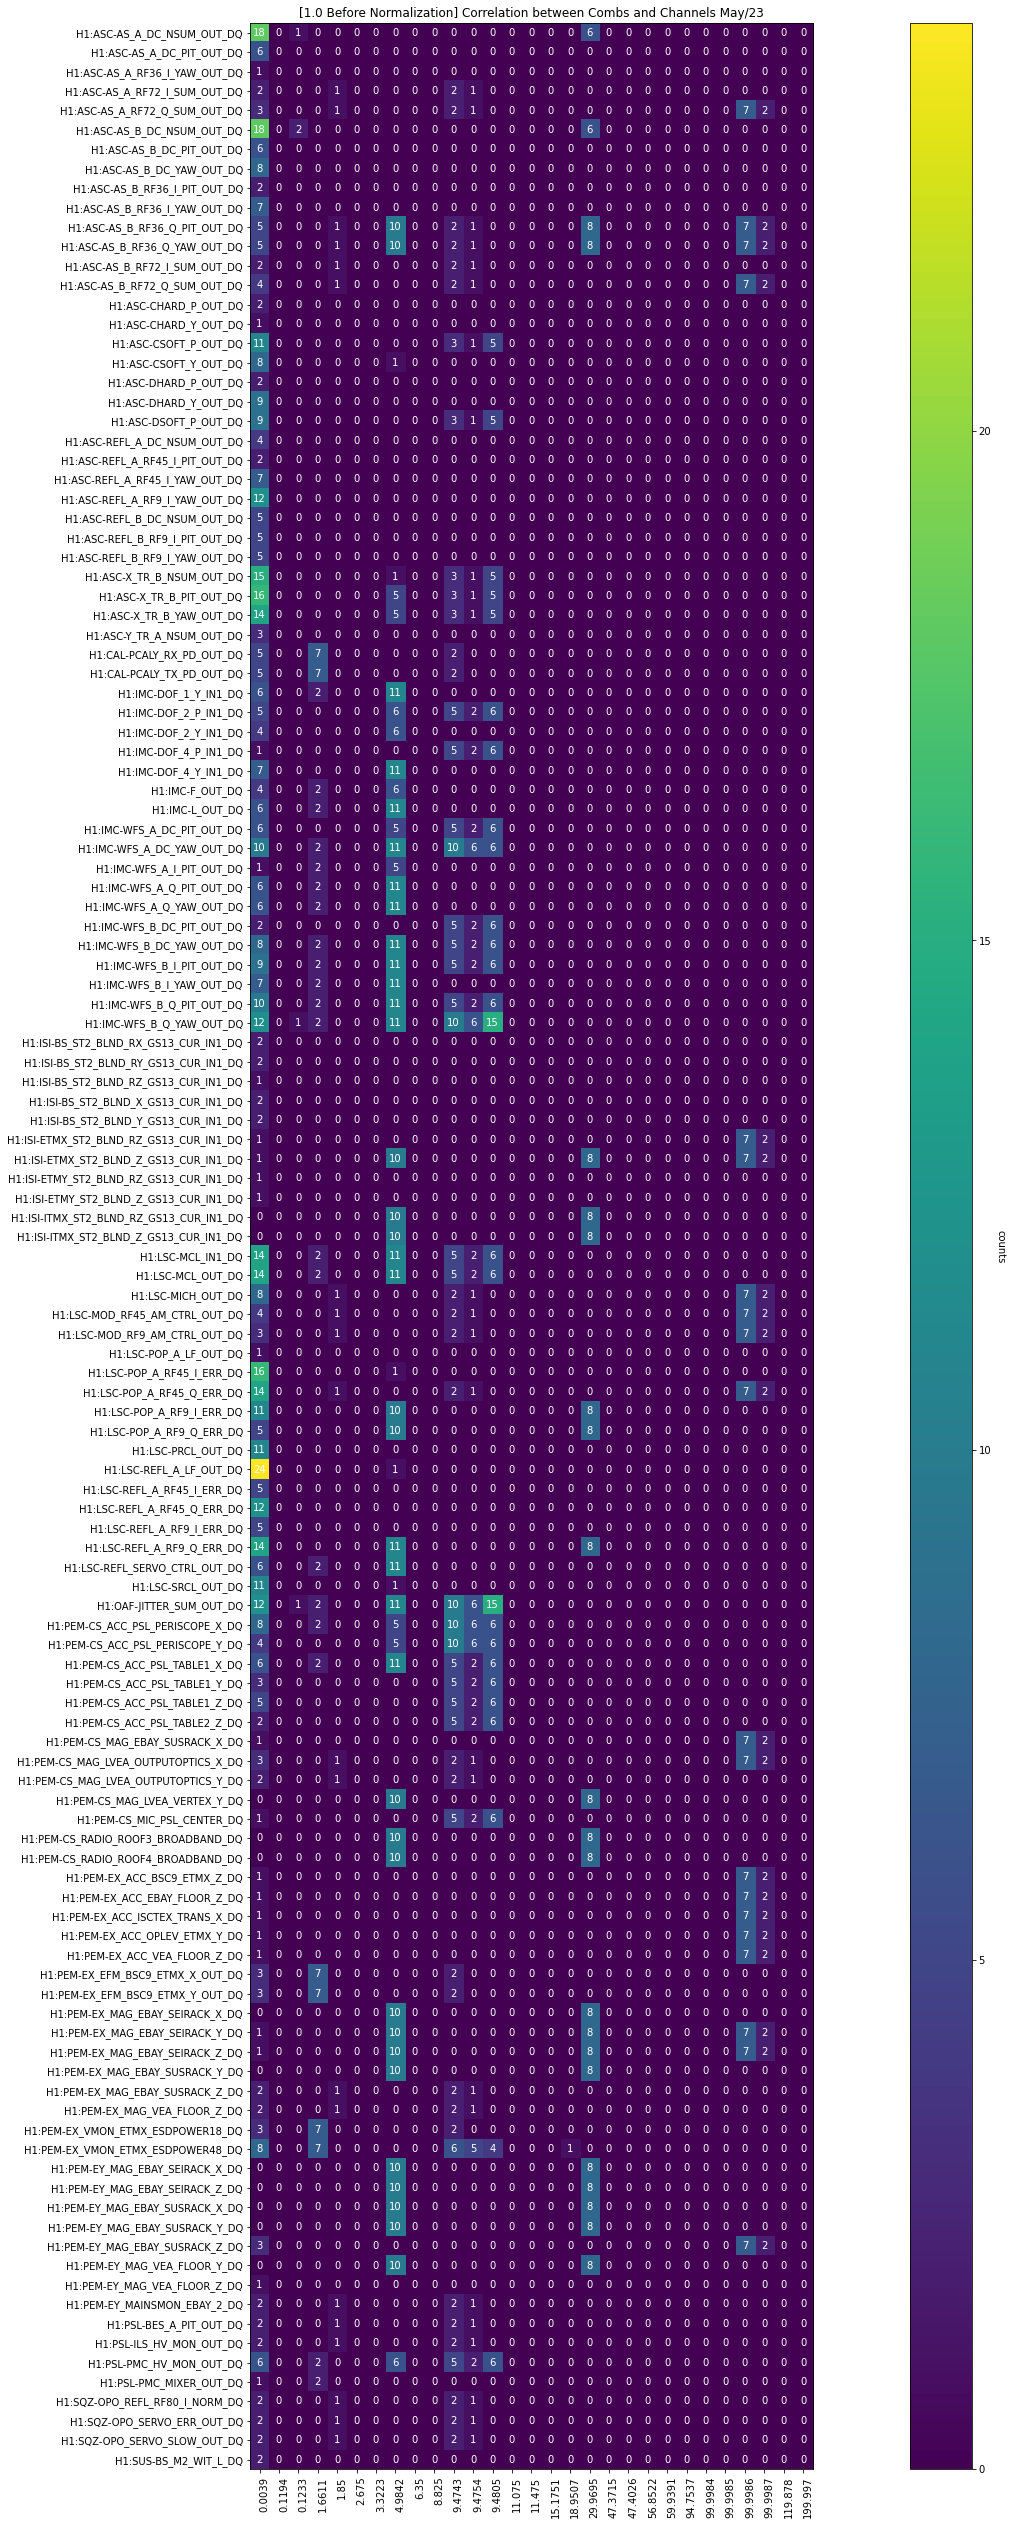

In [20]:
# make 2d numpy array with zeros
# perform the "counts"

mtx = np.zeros((len(ChToIndex), len(CombToIndex)), dtype=int) 
#mtx.shape
for i in range(len(DF)):

    for c in range(allCols):
        if (type(DF["Channels" + str(c+1)][i])==str):
            row = ChToIndex[DF["Channels" + str(c+1)][i]]
            col = CombToIndex[DF['Comb'][i]]
    
            mtx[row,col] += 1
fig, ax = plt.subplots(figsize=(35,45))
im = ax.imshow(mtx)
ax.set_xticks(np.arange(len(sortedComb)), labels=sortedComb)
ax.set_yticks(np.arange(len(sortedCh)), labels=sortedCh)
plt.title('[1.0 Before Normalization] Correlation between Combs and Channels May/23') 
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
for i in range(len(sortedCh)):
    for j in range(len(sortedComb)):
        text = ax.text(j, i, mtx[i, j],
                       ha="center", va="center", color="w")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, aspect=40)
cbar.ax.set_ylabel('counts', rotation=-90, va="bottom")

plt.savefig('[1.0 Before Normalization] Correlation between Combs and Channels May/23.png', facecolor='white')
plt.close()
#wb = openpyxl.load_workbook('May2023_all.xlsx')
#ws = wb.create_sheet('Coh_Comb_Corr_May2023')
#img = openpyxl.drawing.image.Image("[1.0 Before Normalization] Correlation between Combs and Channels May/23.png")
#img.anchor = 'A1'
#ws.add_image(img)
#wb.save('May2023_all.xlsx')

In [ ]:
# create an row array to store the sum of comb over each channels(row)
chSum = np.sum(mtx, axis=0)
chSum
mtx_normalized=(mtx/chSum)*100
mtx_normalized = np.around(mtx_normalized, decimals=0)
mtx_normalized
f'{mtx_normalized[0,0]:.0f}'



### use {:.0f} to round averaged counts to an int
* `f'{mtx[0,0]:.0f}'`
* syntax `{code}`, `mtx[i,j]` is var, `.0f` is format specification

In [ ]:

fig, ax = plt.subplots(figsize=(30,55))
im = ax.imshow(mtx_normalized)
ax.set_xticks(np.arange(len(sortedComb)), labels=sortedComb)
ax.set_yticks(np.arange(len(sortedCh)), labels=sortedCh)
plt.title('[2.0 Normalized] Correlation between Combs and Channels May/23') 
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
for i in range(len(sortedCh)):
    for j in range(len(sortedComb)):
        text = ax.text(j, i, f'{mtx_normalized[i,j]:.0f}',
                       ha="center", va="center", color="w")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, aspect=40)
cbar.ax.set_ylabel('counts', rotation=-90, va="bottom")

plt.savefig("[2.0 Normalized] Correlation between Combs and Channels May/23.png", facecolor='white')
#wb = openpyxl.load_workbook('May2023_all.xlsx')
#ws = wb.create_sheet('Coh_Comb_Corr_May2023')
#img = openpyxl.drawing.image.Image("[2.0 Normalized]Correlation between Combs and Channels May/23.png")
#img.anchor = 'A1'
#ws.add_image(img)
#wb.save('May2023_all.xlsx')

### get rid of the white column by removing the empty combs
* Use boolean indexing  `[:,b]`

In [ ]:

# create an row array to store the sum of comb over each channels(row)
chSum = np.sum(mtx, axis=0)
chSum
mtx_normalized=(mtx/chSum)*100 #(mtx/chSum) matrix(2d-array) divide vector; broadcasting (elem-wise mult)
mtx_normalized = np.around(mtx_normalized, decimals=0)
mtx_normalized
f'{mtx_normalized[0,0]:.0f}'

# a vector: val = 1 if all_nums != nan; True ->isnan
np.isnan(mtx_normalized)

# True if the whole column is true(nan)->no numbers in it
np.all(np.isnan(mtx_normalized),axis = 0)

#np.all(np.isnan(mtx_normalized),axis = 0).shape = (29,0) ---> total Number of comb

# b is an boolean arr, True:atleast1num, False:nan
b = ~np.all(np.isnan(mtx_normalized),axis = 0)

# generate new matrix where only contains columns that b is True
remain_mtx = mtx_normalized[:,b] # loop over all rows and all col, where b is T.

# remain_mtx.shape is (126, 12)
# 
remain_sortedComb = []
for i in range(len(sortedComb)):
    if b[i]:
        remain_sortedComb.append(sortedComb[i])

remain_sortedComb
# modify sortedComb to adjust the tick labels
#remain_sortedComb = sortedComb[list(np.argwhere(b).flatten())]
#remain_sortedComb



In [ ]:
list(np.argwhere(b).flatten())

In [ ]:
fig, ax = plt.subplots(figsize=(30,40))
im = ax.imshow(remain_mtx)
ax.set_xticks(np.arange(len(remain_sortedComb)), labels=remain_sortedComb)
ax.set_yticks(np.arange(len(sortedCh)), labels=sortedCh)
plt.title('[3.0 Normalized ColorBarToDo] Correlation between Combs and Channels May/23') 
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
for i in range(len(sortedCh)):
    for j in range(len(remain_sortedComb)):
        text = ax.text(j, i, f'{remain_mtx[i,j]:.0f}',
                       ha="center", va="center", color="w")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, aspect=40)
cbar.ax.set_ylabel('counts', rotation=-90, va="bottom")

plt.savefig("[3.0 Normalized ColorBarToDo] Correlation between Combs and Channels May/23.png", facecolor='white')
#wb = openpyxl.load_workbook('May2023_all.xlsx')
#ws = wb.create_sheet('Coh_Comb_Corr_May2023')
#img = openpyxl.drawing.image.Image("Correlation between Combs and Channels May 2023.png")
#img.anchor = 'A1'
#ws.add_image(img)
#wb.save('May2023_all.xlsx')

In [ ]:
fig, ax = plt.subplots(figsize=(30,40))
im = ax.imshow(np.log(remain_mtx + 1)) # make zeros to 1
ax.set_xticks(np.arange(len(remain_sortedComb)), labels=remain_sortedComb)
ax.set_yticks(np.arange(len(sortedCh)), labels=sortedCh)
plt.title('[4.0 Normalized Complete] Correlation between Combs and Channels May/23') 
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
for i in range(len(sortedCh)):
    for j in range(len(remain_sortedComb)):
        text = ax.text(j, i, f'{remain_mtx[i,j]:.0f}',
                       ha="center", va="center", color="w")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, aspect=40)
cbar.ax.set_ylabel('counts', rotation=-90, va="bottom")

plt.savefig("[4.0 Normalized Complete] Correlation between Combs and Channels May/23.png", facecolor='white')
#wb = openpyxl.load_workbook('May2023_all.xlsx')
#ws = wb.create_sheet('Coh_Comb_Corr_May2023')
#img = openpyxl.drawing.image.Image("Correlation between Combs and Channels May 2023.png")
#img.anchor = 'A1'
#ws.add_image(img)
#wb.save('May2023_all.xlsx')

### Heatmap that delete channels that has nan